# Part 1

In [ ]:
# import necessary libraries

import warnings
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

from itertools import chain, combinations

import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the dataset and show it's first 5 rows

df = pd.read_csv("coins_data.csv")

df.head()

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,LEO,1.823284e+06,3586504072,"985,239,504",PoS,Ethereum
1,UNI,9.918768e+07,3992451215,"1,000,000,000",PoS,Ethereum
2,WBTC,1.415410e+08,4237575489,"163,106",PoW,Ethereum
3,AVAX,2.197065e+08,4901630273,"431,804,080",PoS,Avalanche
4,DAI,2.177113e+08,5513660644,"5,347,888,596",stablecoin,Ethereum


In [ ]:
# select the required features
X = df.loc[:, ["MarketCap", "Volume"]]

# scaling the values of the features with MinMaxScaler
feature_mtx = MinMaxScaler().fit_transform(X)

# show the scaled data
feature_mtx

array([[0.00000000e+00, 0.00000000e+00],
       [8.91217588e-04, 2.93729393e-03],
       [1.42936416e-03, 4.21501166e-03],
       [2.88723205e-03, 6.57311084e-03],
       [4.23088538e-03, 6.51292116e-03],
       [4.43415944e-03, 7.42650233e-03],
       [4.70429070e-03, 1.77834187e-02],
       [5.34013845e-03, 8.14777173e-03],
       [6.74657405e-03, 6.08597937e-03],
       [9.80616399e-03, 1.27151001e-02],
       [1.04577777e-02, 1.90684100e-02],
       [1.48319012e-02, 1.89855393e-02],
       [1.87106159e-02, 1.09502864e-02],
       [1.87629889e-02, 1.53331309e-01],
       [4.38974280e-02, 4.06484927e-02],
       [7.40529425e-02, 1.10532810e-01],
       [9.00404101e-02, 2.04833000e-02],
       [1.55877305e-01, 1.00000000e+00],
       [4.22606052e-01, 2.66741857e-01],
       [1.00000000e+00, 6.92833799e-01]])

In [ ]:
# calculate the distance matrix
dist_matrix = euclidean_distances(feature_mtx,feature_mtx)

# show the distance matrix
dist_matrix

array([[0.00000000e+00, 3.06952185e-03, 4.45077580e-03, 7.17926841e-03,
        7.76650070e-03, 8.64954952e-03, 1.83951171e-02, 9.74183057e-03,
        9.08600057e-03, 1.60572296e-02, 2.17478591e-02, 2.40922393e-02,
        2.16793893e-02, 1.54475047e-01, 5.98271188e-02, 1.33046385e-01,
        9.23408958e-02, 1.01207595e+00, 4.99747030e-01, 1.21656018e+00],
       [3.06952185e-03, 0.00000000e+00, 1.38642142e-03, 4.14767867e-03,
        4.89269773e-03, 5.71886607e-03, 1.53279793e-02, 6.85142144e-03,
        6.64826439e-03, 1.32318465e-02, 1.87545189e-02, 2.12576772e-02,
        1.95381423e-02, 1.51452170e-01, 5.71985021e-02, 1.30113155e-01,
        9.08594566e-02, 1.00903653e+00, 4.97429642e-01, 1.21415631e+00],
       [4.45077580e-03, 1.38642142e-03, 0.00000000e+00, 2.77236551e-03,
        3.62338367e-03, 4.39800717e-03, 1.39580376e-02, 5.54623812e-03,
        5.63677578e-03, 1.19340806e-02, 1.73820509e-02, 1.99448361e-02,
        1.85473877e-02, 1.50120367e-01, 5.59547584e-02, 1.2875

In [ ]:
# calculate the linkage data using complete distance for plot dendrogram chart
linkage_data = linkage(dist_matrix, "complete")

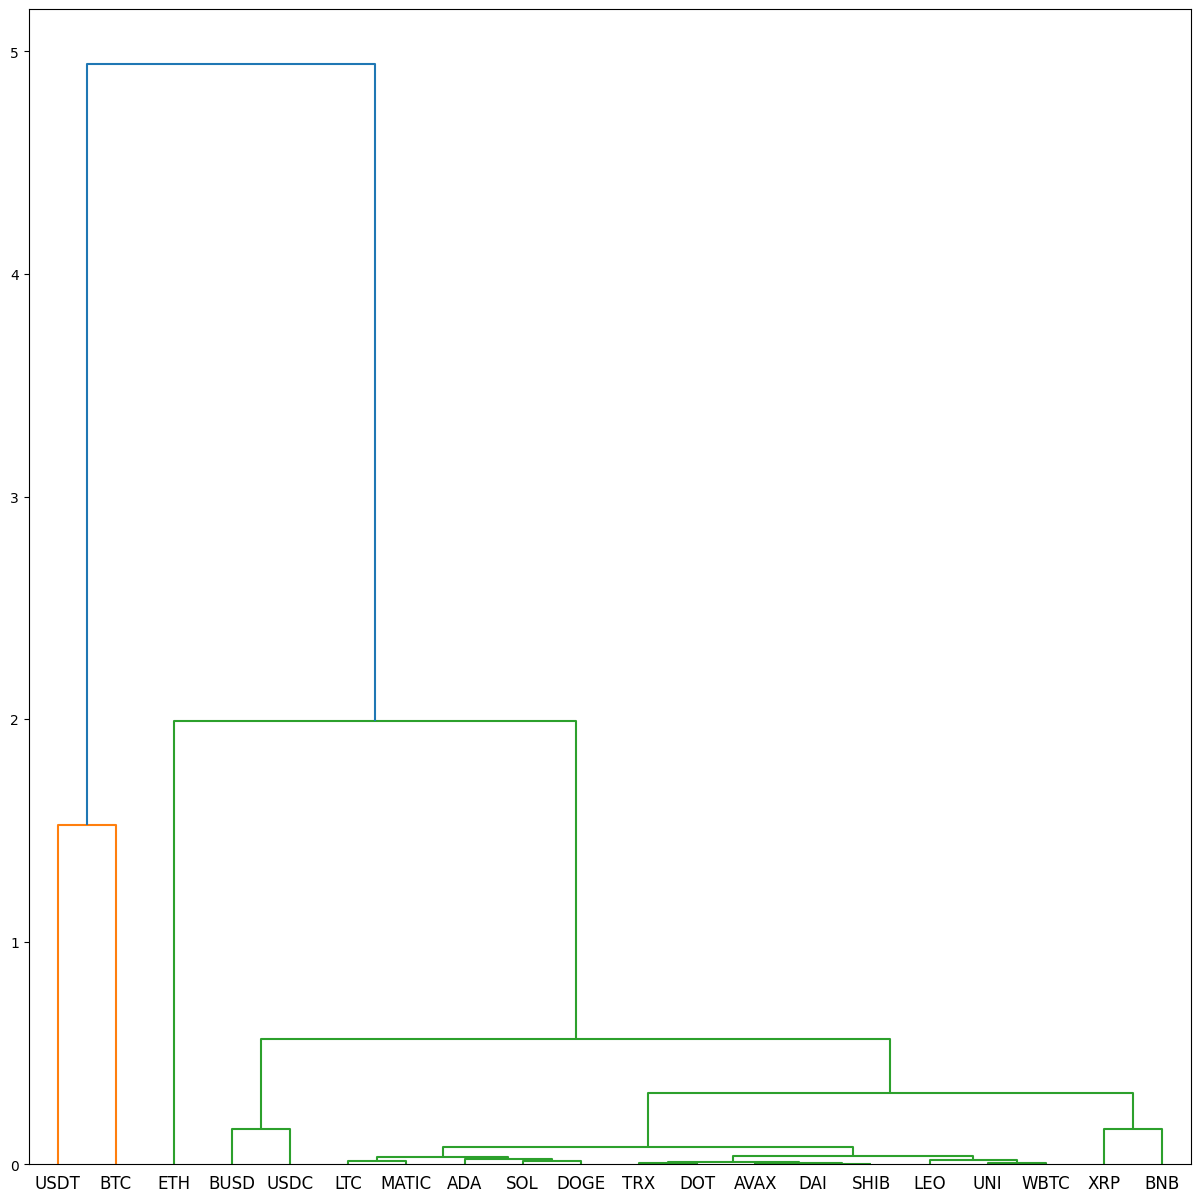

In [ ]:
def llf(ID):
    """get the index of a coin in our dataset and return it's name

    Args:
        ID (_int_): index of coin in dataset

    Returns:
        _str_: the name of the coin
    """
    return df["Symbol"][ID]

# create a figure with size 15*15
fig = plt.figure(figsize=(15, 15))

# plot dendrogram chart
dendro = dendrogram(
    linkage_data,
    leaf_label_func=llf,
    leaf_rotation=0,
    leaf_font_size=12,
)

In [ ]:
# create agglomerative clustering model object
agglom = AgglomerativeClustering(n_clusters=2, linkage="complete")
# train the model with data
agglom.fit(dist_matrix)

# show the predicted labels
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
# add the predicted label of clusters to our dataset
df["cluster_label"] = agglom.labels_

# show the first 5 rows of the dataset
df.head()

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network,cluster_label
0,LEO,1.823284e+06,3586504072,"985,239,504",PoS,Ethereum,0
1,UNI,9.918768e+07,3992451215,"1,000,000,000",PoS,Ethereum,0
2,WBTC,1.415410e+08,4237575489,"163,106",PoW,Ethereum,0
3,AVAX,2.197065e+08,4901630273,"431,804,080",PoS,Avalanche,0
4,DAI,2.177113e+08,5513660644,"5,347,888,596",stablecoin,Ethereum,0


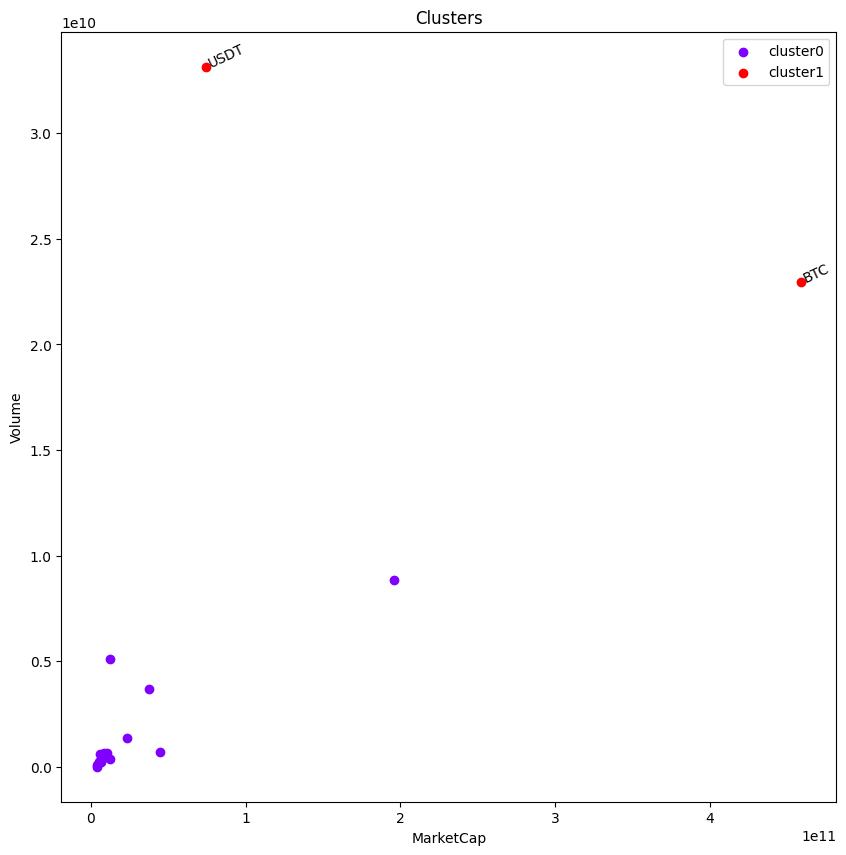

In [ ]:
# number of clusters
n_clusters = max(agglom.labels_) + 1
# create some colors for use in our plot
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# list of the cluster labels
cluster_labels = list(range(0, n_clusters))

# create a figure of size 10 inches by 10 inches.
fig = plt.figure(figsize=(10, 10))

# create scatter plot
for color, label in zip(colors, cluster_labels):
    subset = df[df["cluster_label"] == label]
    for i in subset.index:
        if subset["cluster_label"][i] == 1:
            plt.text(
                subset["MarketCap"][i],
                subset["Volume"][i],
                str(subset["Symbol"][i]),
                rotation=25,
            )
    plt.scatter(
        subset["MarketCap"],
        subset["Volume"],
        c=color,
        label="cluster" + str(label),
    )

# plot settings
plt.legend(loc="best")
plt.title("Clusters")
plt.xlabel("MarketCap")
plt.ylabel("Volume");

In [ ]:
# calculate score of the model
metrics.silhouette_score(dist_matrix, agglom.fit_predict(dist_matrix))

0.8760707016767073

# Part 2

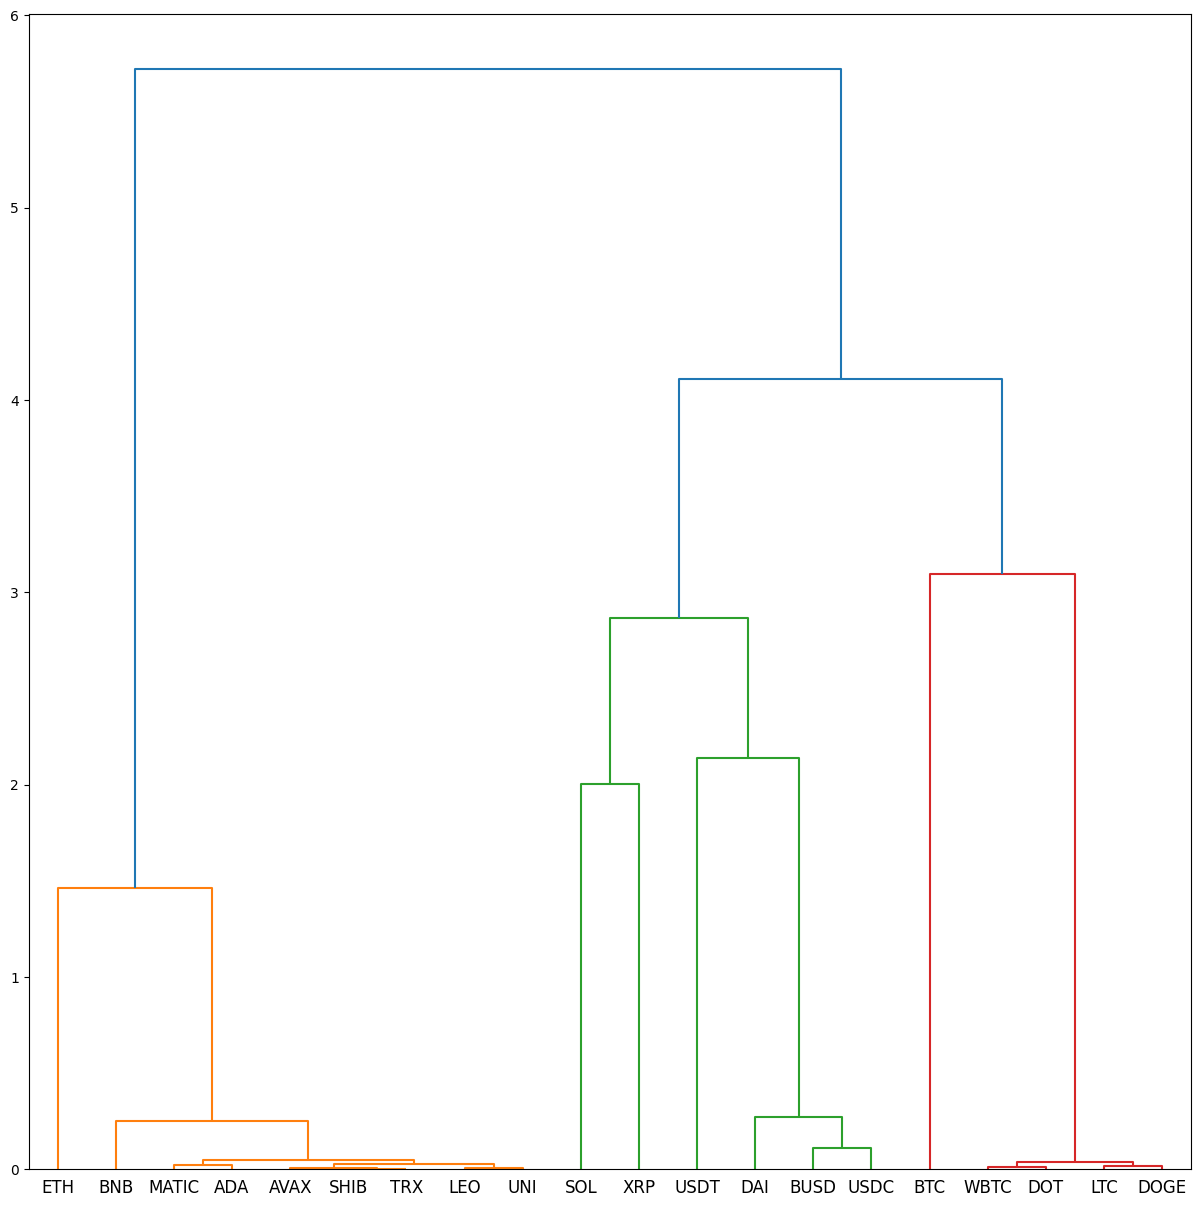

In [ ]:
# read the dataset
df = pd.read_csv("coins_data.csv")

# select the required features
X = df.loc[:, ["MarketCap", "Volume", "ProofType"]]

# encode ProofType feature with OneHotEncoder method
X = pd.get_dummies(X, columns=["ProofType"])

# scaling the values of the features with MinMaxScaler
feature_mtx = MinMaxScaler().fit_transform(X)

# calculate the distance matrix
dist_matrix = euclidean_distances(feature_mtx,feature_mtx)

# calculate the linkage data using complete distance for plot dendrogram chart
linkage_data = linkage(dist_matrix, "complete")

# create a figure with size 15*15
fig = plt.figure(figsize=(15, 15))

# plot dendrogram chart
dendro = dendrogram(
    linkage_data,
    leaf_label_func=llf,
    leaf_rotation=0,
    leaf_font_size=12,
)

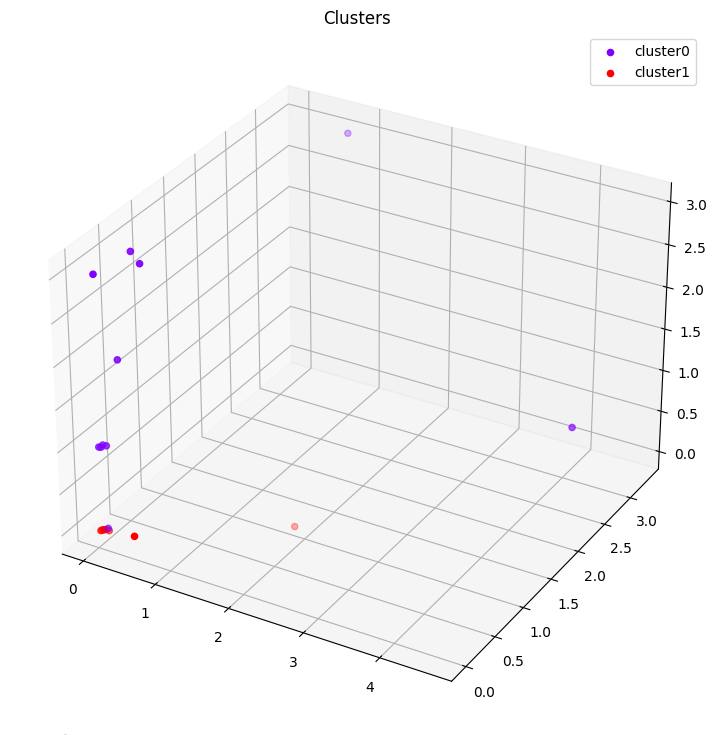

In [ ]:
# create agglomerative clustering model object
agglom = AgglomerativeClustering(n_clusters=2, linkage="complete")
# train the model with data
agglom.fit(dist_matrix)

# add the predicted label of clusters to our dataset
df["cluster_label"] = agglom.labels_

# number of clusters
n_clusters = max(agglom.labels_) + 1
# create some colors for use in our plot
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# list of the cluster labels
cluster_labels = list(range(0, n_clusters))

# create a figure of size 9 inches by 9 inches.
fig = plt.figure(figsize=(9, 9))
ax = plt.axes(projection ="3d")

# create scatter plot
for color, label in zip(colors, cluster_labels):
    subset = df[df["cluster_label"] == label]
    ax.scatter3D(
        subset["MarketCap"],
        subset["Volume"],
        LabelEncoder().fit(subset["ProofType"]).transform(subset["ProofType"]),
        c=color,
        label="cluster" + str(label),
    )

# plot settings
ax.legend(loc="best")
ax.set_title("Clusters");

In [ ]:
# calculate score of the model
score = metrics.silhouette_score(dist_matrix, agglom.fit_predict(dist_matrix))
# print the result
print("silhouette score of the model:", score)

silhouette score of the model: 0.6431524346913586


# Part 3

In [ ]:
# read the dataset
df = pd.read_csv("coins_data.csv")
df["TotalSupply"] = df["TotalSupply"].str.split(",").str.join("").astype(float)


def powerset(iterable):
    """a function for return all subsets of an iterable

    Args:
        iterable: collection of some data

    Returns:
        all subsets of the iterable
    """
    return chain.from_iterable(
        combinations(iterable, r) for r in range(len(iterable) + 1)
    )


# feature selection using exhaustively feature selection method
max_score = 0
selected_features = None
for features in list(
    powerset(["Volume", "MarketCap", "TotalSupply", "ProofType", "Network"])
)[1:]:
    # select the required features
    X = df.loc[:, list(features)]

    # encode categorical features (if exists) with OneHotEncoder method
    if "ProofType" in features:
        X = pd.get_dummies(X, columns=["ProofType"])
    if "Network" in features:
        X = pd.get_dummies(X, columns=["Network"])

    # scaling the values of the features with MinMaxScaler
    feature_mtx = MinMaxScaler().fit_transform(X)

    # calculate the distance matrix
    dist_matrix = euclidean_distances(feature_mtx, feature_mtx)

    # create agglomerative clustering model object
    agglom = AgglomerativeClustering(n_clusters=2, linkage="complete")
    # train the model with data
    agglom.fit(dist_matrix)

    # calculate score of the model
    score = metrics.silhouette_score(dist_matrix, agglom.fit_predict(dist_matrix))
    # print the result
    if score > max_score:
        max_score = score
        selected_features = list(features)

# print the best features for clustering and maximum score
print("selected feature(s):", selected_features)
print("silhouette score of the model:", max_score)

selected feature(s): ['TotalSupply']
silhouette score of the model: 0.949945745145549
